In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime, date
import re

In [18]:
file_path='E:/Metro2/raw_data//'
df=pd.read_csv(file_path+'Metro survey no 2 post-processed data Q12c and Q23 updated (17-05-2024 to 18-05-2023) 104 samples.csv')

In [19]:
for column in df.select_dtypes(include='object').columns:
    if re.match(r'^12c\([a-e]\)$', column):
        df[column] = df[column].apply(lambda x: 'Will use for both trips' if ',' in x else x)
    df[column] = df[column].str.replace(r'\(.*\)', '', regex=True)


In [20]:
df['1'].unique()

array(['Vasundhara N ', 'Ruthu m', 'Keerthi M ', 'Sneha', 'sneha',
       'Tulasi ', 'Anshu'], dtype=object)

In [21]:
name_dict = {'Tulasi ':'Tulasi', 'Vasundhara N ': 'Vasundhara N', 'Tulasi NS ':'Tulasi',
        'Varad ':'varad', 'Varad Verma ':'varad', 'Varad Verm ':'varad',
       'Varad. Verma ':'varad', 'Varad Verma':'varad', 'Varad verma':'varad','Sneha ':'Sneha',
       'HAMIM SADIQUE ':'HAMIM','HAMIM SADIQUE':'HAMIM','Gayathri Krija ':'Gayathri Krija','tulasi ':'Tulasi',
       'Ruthu m':'Ruthu','Ruthu m ':'Ruthu','sneha':'Sneha','HariPrasad h':'HariPrasad','Hari Prasad ':'HariPrasad','HARIPRASAD ':'HariPrasad',
       'HariPrasad ':'HariPrasad'}

# map column 1 names to the above name_dict
df['1'] = df['1'].map(name_dict).fillna(df['1'])

print(df['1'].unique(),df.shape[0])

['Vasundhara N' 'Ruthu' 'Keerthi M ' 'Sneha' 'Tulasi' 'Anshu'] 104


### Income not reported

In [22]:
# print the unique values of column 1 where column 21 is NA or null
print(df[df['21'].isna()]['1'].unique())

[]


In [23]:

df['Time stamp time'] = pd.to_datetime(df['Timestamp']).apply(lambda x: x.time())
df['Start time of survey']=pd.to_datetime(df['Start time of survey'])
df['Start time of survey'] = df['Start time of survey'].apply(lambda x: datetime.strftime(x, '%H:%M:%S'))


C:\Users\PC\AppData\Local\Temp\ipykernel_126496\800887808.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Time stamp time'] = pd.to_datetime(df['Timestamp']).apply(lambda x: x.time())
C:\Users\PC\AppData\Local\Temp\ipykernel_126496\800887808.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start time of survey']=pd.to_datetime(df['Start time of survey'])


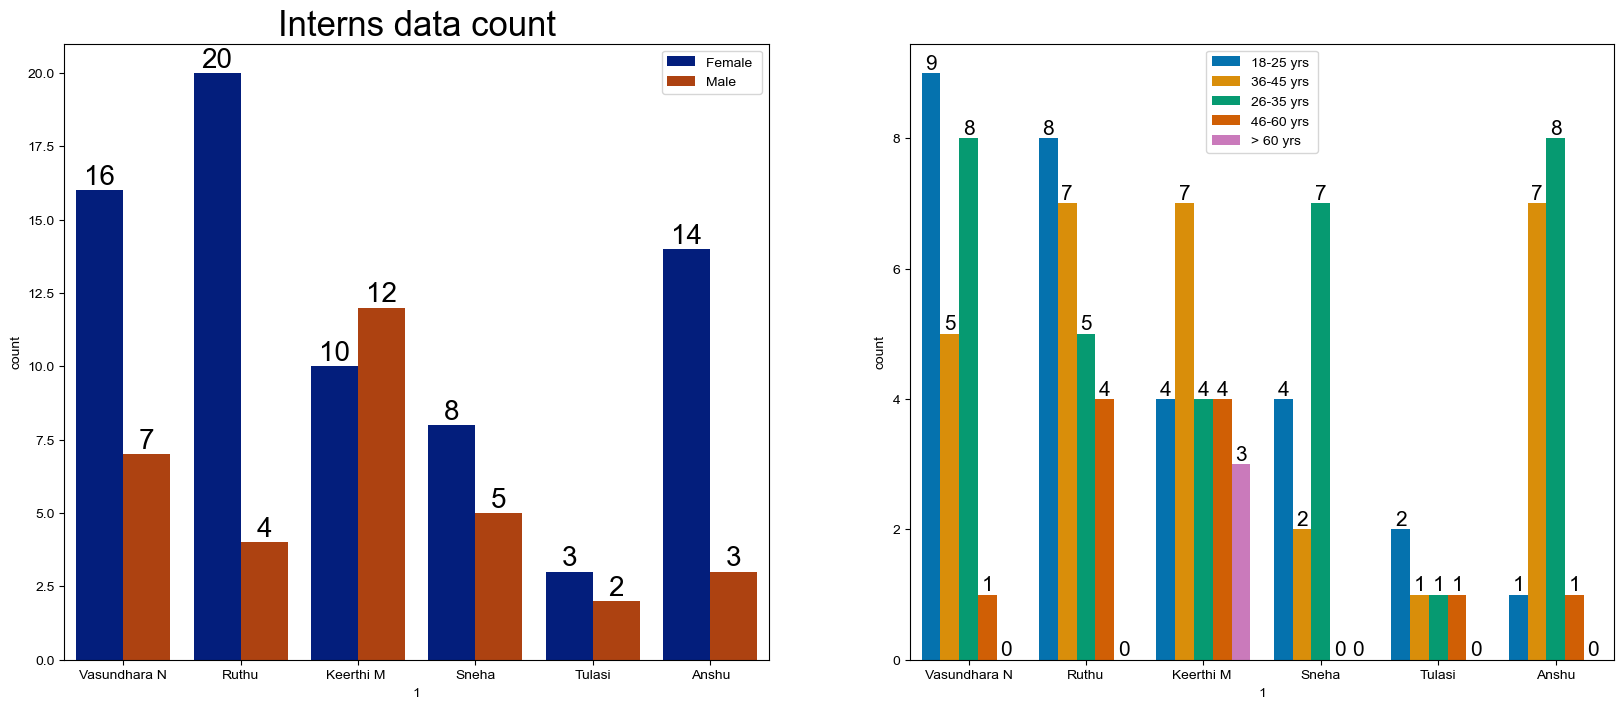

In [24]:
plt.rcParams['font.family'] = 'Arial'
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['1'],data=df,palette = 'dark',hue='17',saturation=0.95,ax=ax[0])
ax[0].set_title('Interns data count',color='black',size=25)
ax[0].legend()
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
sns.countplot(x=df['1'],data=df,palette = 'colorblind',hue='18',saturation=0.95,ax=ax[1])
ax[1].legend()
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)   


In [25]:
parking_dict={'No, I will not use a bicycle. ':'Will not use',
       'Current travelling conditions with no special cycling facility. Per Trip cost 0₹. Parking cost of 10₹ per day. ':'Current conditions',
       'If a marked cycle lane is provided. Per Trip cost 1₹. Parking cost 10₹ per day. ':'Marked lane',
       'Not Applicable- because neither of my trip end is home. ':'NA',
       'If a marked cycle lane provided along with bicycle traffic signals is provided. Per Trip cost 2₹. Parking cost 10₹ per day. ':'Marked lane + signal',
       'If a segregated cycle track is provided. Per Trip cost 3₹.. Parking cost 10₹ per day. ':'Segregated track',
       'If a segregated cycle track with bicycle signal is provided. Per Trip cost 4₹. Parking cost 10₹ per day. ':'Segregated track + signal'}

df['23']=df['23'].map(parking_dict).fillna(df['23'])

In [26]:
# lets get the count of number of instances for each unique value of column 1 where when column 4 and column 6 both are not equal to Home and also column 23 
# is not equal to NA
print(df[(df['4']!='Home ') & (df['6']!='Home ') & (df['23']!='NA')]['1'].value_counts())

1
Keerthi M       6
Vasundhara N    1
Name: count, dtype: int64


### Check of qualification with age 

In [27]:
# lets see the value counts of each value in column 19 for each unique entry of column 18
df.groupby('18')['19'].value_counts()

18          19                        
18-25 yrs   Graduate                      22
            Trade/Diploma Certificate      5
            12th Std.                      1
26-35 yrs   Graduate                      25
            12th Std.                      3
            Trade/Diploma Certificate      3
            Postgraduate                   2
36-45 yrs   Graduate                      15
            12th Std.                      7
            Postgraduate                   3
            Trade/Diploma Certificate      2
            10th Std.                      2
46-60 yrs   Graduate                       4
            12th Std.                      4
            10th Std.                      1
            < 10th Std.                    1
            Trade/Diploma Certificate      1
> 60 yrs    Graduate                       2
            12th Std.                      1
Name: count, dtype: int64

### Age and occupation

In [28]:
df.groupby('18')['20'].value_counts()

18          20                           
18-25 yrs   Student                          23
            Employed Private                  5
26-35 yrs   Employed Private                 25
            Unemployed/Retired/Homemaker      6
            Employed Govt.                    1
            Business                          1
36-45 yrs   Unemployed/Retired/Homemaker     13
            Employed Private                 12
            Daily Wage                        2
            Employed Govt.                    1
            Business                          1
46-60 yrs   Unemployed/Retired/Homemaker      5
            Employed Private                  3
            Business                          1
            Daily Wage                        1
            Employed Govt.                    1
> 60 yrs    Employed Govt.                    2
            Unemployed/Retired/Homemaker      1
Name: count, dtype: int64

#### Prints if the respondent reported as unemployed but his details such as age, OD are not consistent

In [29]:
df['20'].unique()

# for each entry of column 20 with 'Unemployed/Retired/Homemaker ' get the column 1 and column Timestamp if column 18 is not >60 yrs or 46-60 yrs,
#  and column 4 is work and column 6 is work
df[(df['20']=='Unemployed/Retired/Homemaker ') & (df['18']!='>60 yrs') & (df['18']!='46-60 yrs') & (df['4']=='Work ') & (df['6']=='Work ')][['1','Timestamp']]

# df[df['20']=='Unemployed/Retired/Homemaker '][['18','17','4','6']]

,1,Timestamp


In [30]:
df[df['1']=='HariPrasad']['5'].unique()

array([], dtype=object)

### Sanity check for total time

In [31]:
from tabulate import tabulate

output_rows = []

total_10b_11b = df['10a'] + df['11a']
df['9'] = pd.to_numeric(df['9'], errors='coerce')

# Create a list of tuples containing the relevant information
for index, value in df.iterrows():
    if total_10b_11b[index] >= value['9'] - 5:
        output_rows.append([
            value['1'],   # Intern
            index,        # Index
            value['9'],   # Total Time
            value['10a'], # Access Time
            value['11a'], # Egress Time
            value['9']-value['10a']-value['11a'], #difference
            value['2c'],  #Origin
            value['2d'], #Destination
        ])

# Sort the list of tuples based on the enumerator name alphabetically
output_rows.sort(key=lambda x: x[0])

# Print the output as a table
print(tabulate(output_rows, headers=["Intern","Index", "Total Time", "Access Time", "Egress Time","Time in metro","Origin","Destination"]))


Intern      Index    Total Time    Access Time    Egress Time    Time in metro  Origin                   Destination
--------  -------  ------------  -------------  -------------  ---------------  -----------------------  -------------------
Anshu          82            20             10              5                5  Konanakunte Cross        Silk Institute
Ruthu           1            30             10             15                5  Rajajinagar              Banashankari
Ruthu          12            25             10             10                5  Yeshwanthpur             Sandal Soap Factory
Ruthu          54            20              8             10                2  Rajajinagar              Mahalakshmi
Ruthu          76            25             10             10                5  Jayaprakash Nagar        Jayanagar
Tulasi         48            30              5             20                5  Krishna Rajendra Market  Konanakunte Cross


### Sanity check for bicycle question

In [32]:
for column in df.select_dtypes(include='object').columns:
    if re.match(r'^12c\([a-e]\)$', column):
        for index, value in df[column].items():
            if value.count(',') > 1:
                print(f"Intern: {df.iloc[index]['1']}, Question: {column}, Index: {index}")
